In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cymr import models
from cymr import network
from cfr import framework
from psifr import fr
data_file = '/Users/morton/Dropbox/work/cmr_cfr/cfr/cfr_eeg_mixed.csv'
patterns_file = '/Users/morton/Dropbox/work/cmr_cfr/cfr/cfr_patterns.hdf5'
fit_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr/fits'
if not os.path.exists(fit_dir):
    os.makedirs(fit_dir)

In [2]:
data = pd.read_csv(data_file)
patterns = network.load_patterns(patterns_file)

In [3]:
wp = framework.WeightParameters()
wp.add_fixed(Afc=0, Acf=0, Aff=0, Dff=1)
wp.add_free(Lfc=(0, 1), Lcf=(0, 1), P1=(0, 10), P2=(0, 10), 
            B_enc=(0, 1), B_start=(0, 1), B_rec=(0, 1), 
            T=(0, 10), X1=(0, 1), X2=(0, 10))
wp.add_dependent(Dfc=lambda par: 1 - par['Lfc'],
                 Dcf=lambda par: 1 - par['Lcf'])
wp.add_weight_param('fcf', ['loc', 'cat'])
wp.add_weight_param('ff', ['w2v'])
wp

fixed:
Afc: 0
Acf: 0
Aff: 0
Dff: 1
s_w2v: 1

free:
Lfc: (0, 1)
Lcf: (0, 1)
P1: (0, 10)
P2: (0, 10)
B_enc: (0, 1)
B_start: (0, 1)
B_rec: (0, 1)
T: (0, 10)
X1: (0, 1)
X2: (0, 10)
w0: (0, 1)

dependent:
Dfc: <function <lambda> at 0x107b204c0>
Dcf: <function <lambda> at 0x107b200d0>
w_loc: <function WeightParameters.add_weight_param.<locals>.<lambda> at 0x107b20160>
w_cat: <function WeightParameters.add_weight_param.<locals>.<lambda> at 0x11c204af0>

weights:
fcf: {'loc': 'w_loc', 'cat': 'w_cat'}
ff: {'w2v': 's_w2v'}

In [5]:
model = models.CMRDistributed()
results = model.fit_indiv(data, wp.fixed, wp.free, wp.dependent, 
                          patterns=patterns, weights=wp.weights, n_jobs=6, method='de')

In [7]:
res_dir = os.path.join(fit_dir, 'test')
if not os.path.exists(res_dir):
    os.makedirs(res_dir)
time = datetime.now().isoformat(timespec='seconds')
results.to_csv(os.path.join(res_dir, f'param_{time}.csv'))

In [36]:
file = os.path.join(fit_dir, 'test', 'param_2020-05-14T04:53:35.csv')
results = pd.read_csv(file, index_col=0)
print(results['logl'].sum())
results

-26177.827548760226


,Afc,Acf,Aff,Dff,s_w2v,Lfc,Lcf,P1,P2,B_enc,...,B_rec,T,X1,X2,w0,Dfc,Dcf,w_loc,w_cat,logl
subject,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,1.0,0.293593,0.150755,0.190764,8.765413,0.731605,...,0.999998,0.186087,0.007631,0.264603,0.873606,0.706407,0.849245,0.873606,0.126394,-862.215362
2,0.0,0.0,0.0,1.0,1.0,0.426522,0.572480,1.140225,0.757621,0.775971,...,0.864211,0.319783,0.000986,0.407155,0.927423,0.573478,0.427520,0.927423,0.072577,-1009.754676
3,0.0,0.0,0.0,1.0,1.0,0.235738,0.112377,0.119672,4.488846,0.780836,...,0.999530,0.187352,0.005028,0.304894,0.903178,0.764262,0.887623,0.903178,0.096822,-904.110561
5,0.0,0.0,0.0,1.0,1.0,0.014192,0.014097,0.001421,4.693639,0.070668,...,0.958865,0.000180,0.002914,0.261640,0.999835,0.985808,0.985903,0.999835,0.000165,-1052.304342
8,0.0,0.0,0.0,1.0,1.0,0.036967,0.025325,0.159170,3.398446,0.487364,...,0.879673,0.052018,0.009231,0.312348,0.972534,0.963033,0.974675,0.972534,0.027466,-756.385594
11,0.0,0.0,0.0,1.0,1.0,0.472246,0.506479,0.204480,0.638152,0.659832,...,0.943303,0.287291,0.002607,0.330530,0.865383,0.527754,0.493521,0.865383,0.134617,-980.618822
16,0.0,0.0,0.0,1.0,1.0,0.007270,0.005036,0.074724,2.502126,0.672249,...,0.980161,0.005131,0.014622,0.284419,0.998056,0.992730,0.994964,0.998056,0.001944,-635.558016
18,0.0,0.0,0.0,1.0,1.0,0.029895,0.030717,0.001619,8.038474,0.056645,...,0.942790,0.000217,0.003389,0.302613,0.999865,0.970105,0.969283,0.999865,0.000135,-932.786827
22,0.0,0.0,0.0,1.0,1.0,0.210564,0.223193,0.026549,0.487754,0.528629,...,1.000000,0.193480,0.002990,0.360722,0.862043,0.789436,0.776807,0.862043,0.137957,-922.940457


In [18]:
group_param = results.mean().to_dict()
just_param = results.drop(columns='logl')
subj_param = just_param.T.to_dict()
subj_param[1]

{'Afc': 0.0,
 'Acf': 0.0,
 'Aff': 0.0,
 'Dff': 1.0,
 's_w2v': 1.0,
 'Lfc': 0.2935928059167067,
 'Lcf': 0.1507549976927812,
 'P1': 0.19076426248212675,
 'P2': 8.765413246274747,
 'B_enc': 0.7316050525307174,
 'B_start': 0.3735736529897794,
 'B_rec': 0.9999976928133508,
 'T': 0.18608672237945573,
 'X1': 0.007631284134666055,
 'X2': 0.2646031083533547,
 'w0': 0.8736055708976044,
 'Dfc': 0.7064071940832933,
 'Dcf': 0.8492450023072188,
 'w_loc': 0.8736055708976044,
 'w_cat': 0.12639442910239562}

In [20]:
import importlib
from cymr import fit
importlib.reload(models)
importlib.reload(fit)
importlib.reload(network)
model = models.CMRDistributed()
study_data = data.loc[(data['trial_type'] == 'study')]

recalls = model.generate(study_data, {}, subj_param, patterns=patterns, weights=wp.weights)

In [25]:
study_keys = ['item_index', 'session', 'list_type', 'category', 
              'response', 'response_time', 'list_category']
sim = fr.merge_free_recall(recalls, study_keys=study_keys)
#sim.loc[(sim['subject'] == 1) & (sim['list'] == 2)]

In [29]:
merged = fr.merge_free_recall(data, study_keys=study_keys)
full = pd.concat([merged, sim], keys=['data', 'sim'])
full.index.rename(names=['source', 'test'], inplace=True)

In [38]:
full.loc['data']

,subject,list,item,input,output,study,recall,repeat,intrusion,item_index,session,list_type,category,response,response_time,list_category
test,,,,,,,,,,,,,,,,
0,1,2,SEAN PENN,1.0,5.0,True,True,0,False,228.0,1.0,mixed,cel,3.0,1.255,mixed
1,1,2,AUDREY HEPBURN,2.0,NaN,True,False,0,False,19.0,1.0,mixed,cel,3.0,1.040,mixed
2,1,2,ST PATRICKS CATHEDRAL,3.0,11.0,True,True,0,False,463.0,1.0,mixed,loc,2.0,1.164,mixed
3,1,2,LES INVALIDES,4.0,NaN,True,False,0,False,364.0,1.0,mixed,loc,2.0,0.829,mixed
4,1,2,GREAT ZIMBABWE RUINS,5.0,NaN,True,False,0,False,340.0,1.0,mixed,loc,3.0,0.872,mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21322,46,48,WILL SMITH,20.0,3.0,True,True,0,False,253.0,3.0,mixed,cel,3.0,1.021,mixed
21323,46,48,SPORK,21.0,NaN,True,False,0,False,717.0,3.0,mixed,obj,2.0,1.647,mixed
21324,46,48,INHALER,22.0,NaN,True,False,0,False,615.0,3.0,mixed,obj,1.0,2.112,mixed


In [39]:
full.loc['sim']

,subject,list,item,input,output,study,recall,repeat,intrusion,item_index,session,list_type,category,response,response_time,list_category
test,,,,,,,,,,,,,,,,
0,1,2,SEAN PENN,1.0,8.0,True,True,0,False,228.0,1.0,mixed,cel,3.0,1.255,mixed
1,1,2,AUDREY HEPBURN,2.0,7.0,True,True,0,False,19.0,1.0,mixed,cel,3.0,1.040,mixed
2,1,2,ST PATRICKS CATHEDRAL,3.0,6.0,True,True,0,False,463.0,1.0,mixed,loc,2.0,1.164,mixed
3,1,2,LES INVALIDES,4.0,5.0,True,True,0,False,364.0,1.0,mixed,loc,2.0,0.829,mixed
4,1,2,GREAT ZIMBABWE RUINS,5.0,NaN,True,False,0,False,340.0,1.0,mixed,loc,3.0,0.872,mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20875,46,48,WILL SMITH,20.0,12.0,True,True,0,False,253.0,3.0,mixed,cel,3.0,1.021,mixed
20876,46,48,SPORK,21.0,7.0,True,True,0,False,717.0,3.0,mixed,obj,2.0,1.647,mixed
20877,46,48,INHALER,22.0,4.0,True,True,0,False,615.0,3.0,mixed,obj,1.0,2.112,mixed


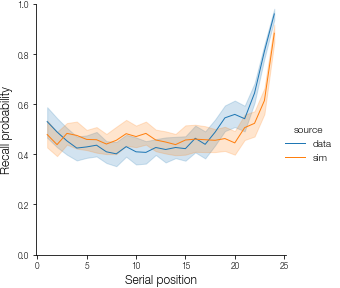

In [31]:
spc = full.groupby(['source']).apply(fr.spc)
g = fr.plot_spc(spc, hue='source', height=4);
g.add_legend();

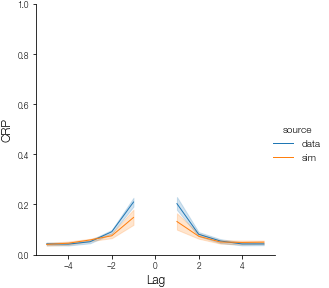

In [32]:
crp = full.groupby(['source']).apply(fr.lag_crp)
g = fr.plot_lag_crp(crp, hue='source', height=4);
g.add_legend();

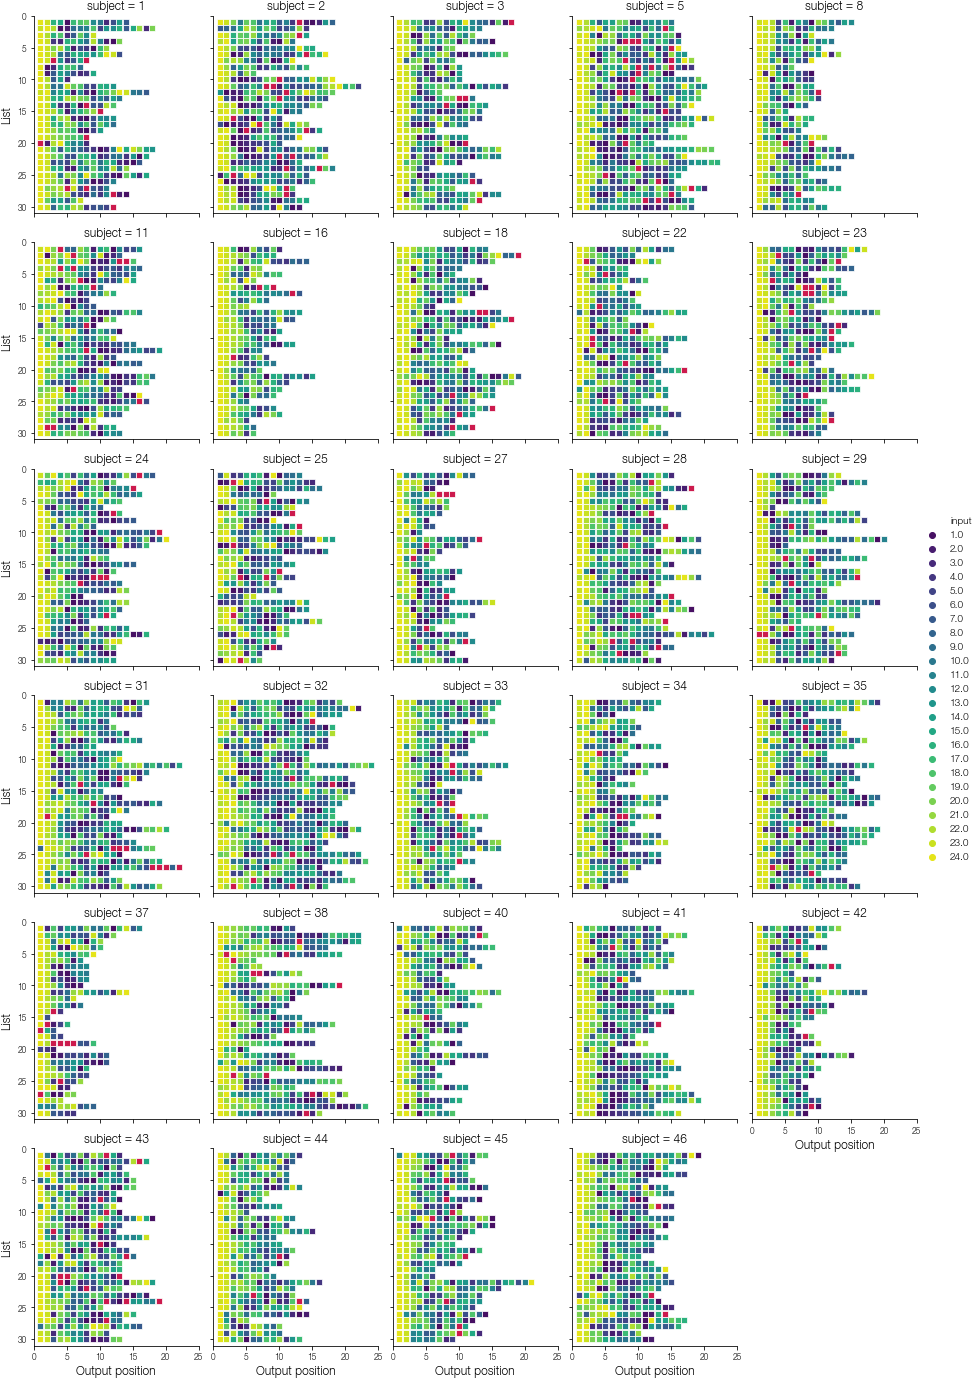

In [51]:
g = fr.plot_raster(fr.reset_list(merged), col='subject', 
                   col_wrap=5, length=3.2, orientation='vertical');
g.add_legend();
g.savefig(os.path.join(fit_dir, 'test', 'raster_data.pdf'))

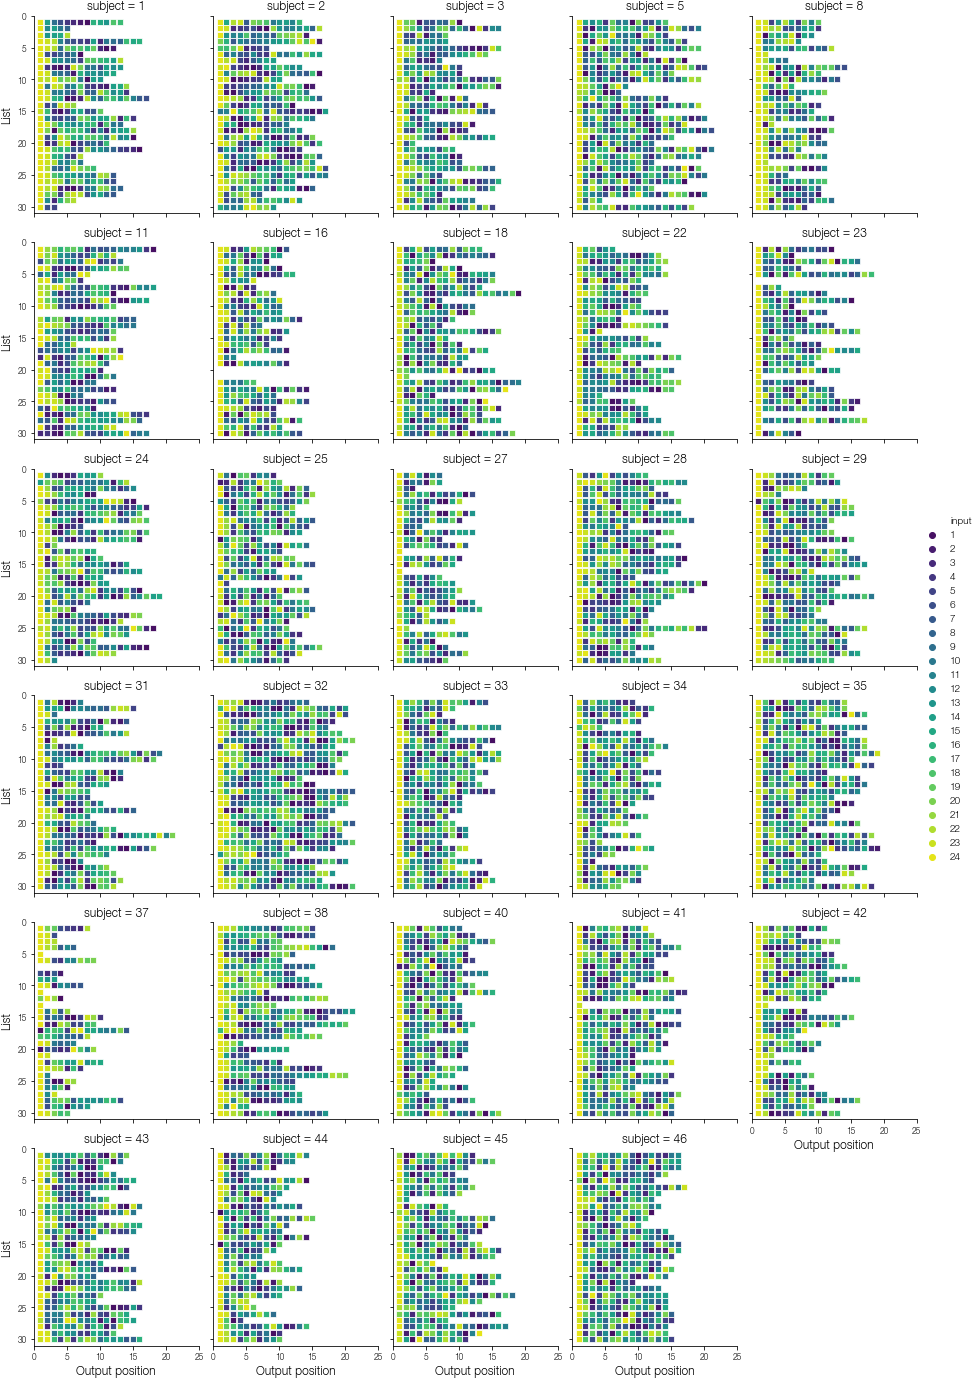

In [52]:
g = fr.plot_raster(fr.reset_list(sim), col='subject', 
                   col_wrap=5, length=3.2, orientation='vertical');
g.add_legend();
g.savefig(os.path.join(fit_dir, 'test', 'raster_sim.pdf'))

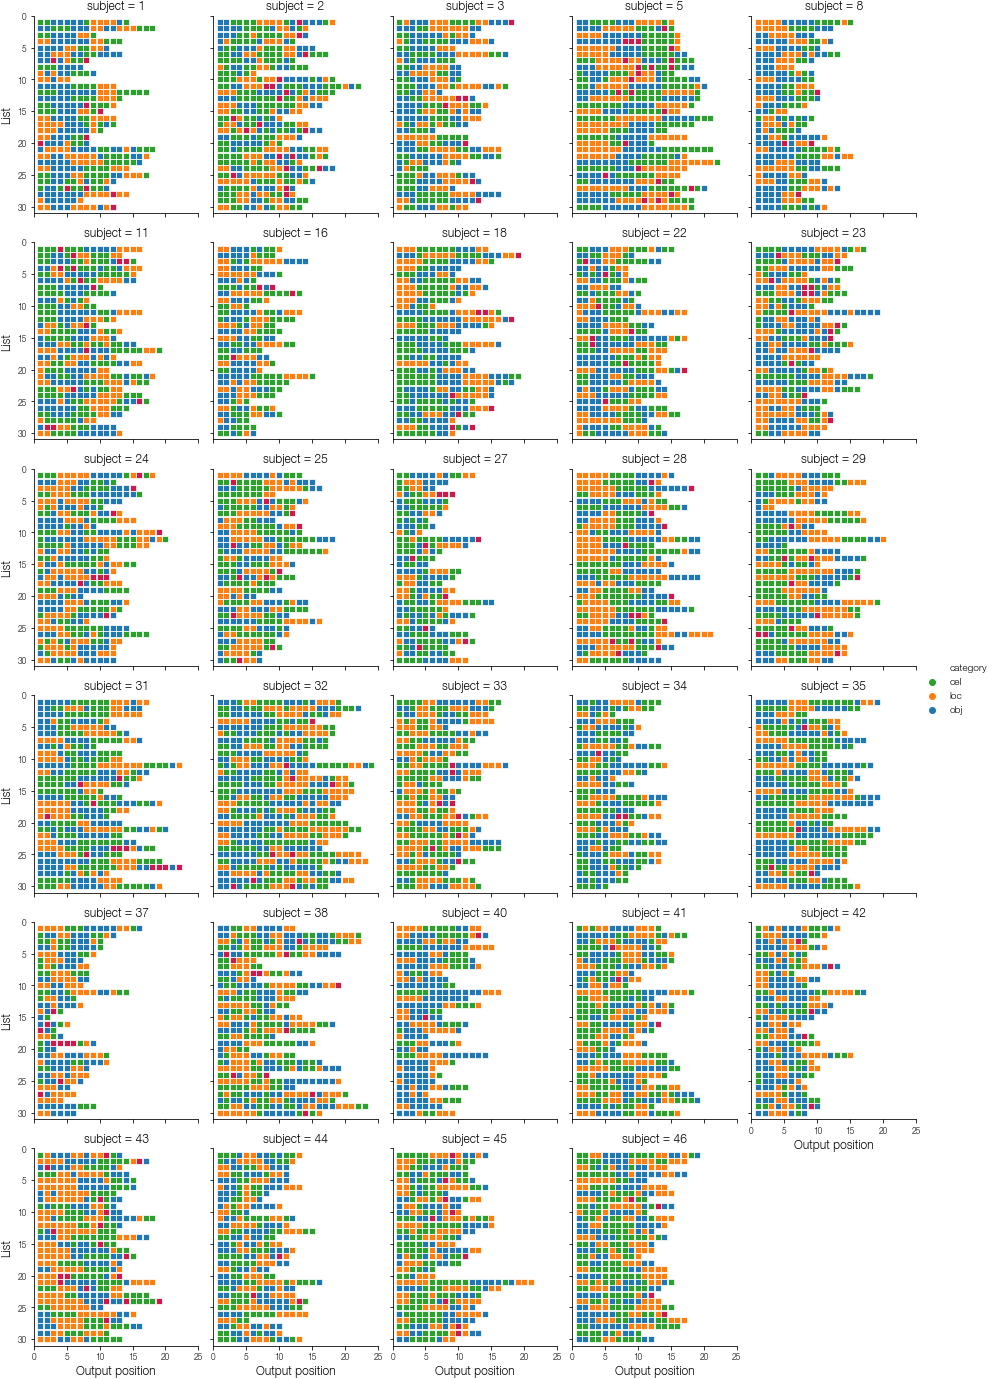

In [53]:
g = fr.plot_raster(fr.reset_list(merged), hue='category', col='subject', 
                   col_wrap=5, length=3.2, orientation='vertical');
g.add_legend();
g.savefig(os.path.join(fit_dir, 'test', 'raster_cat_data.pdf'))

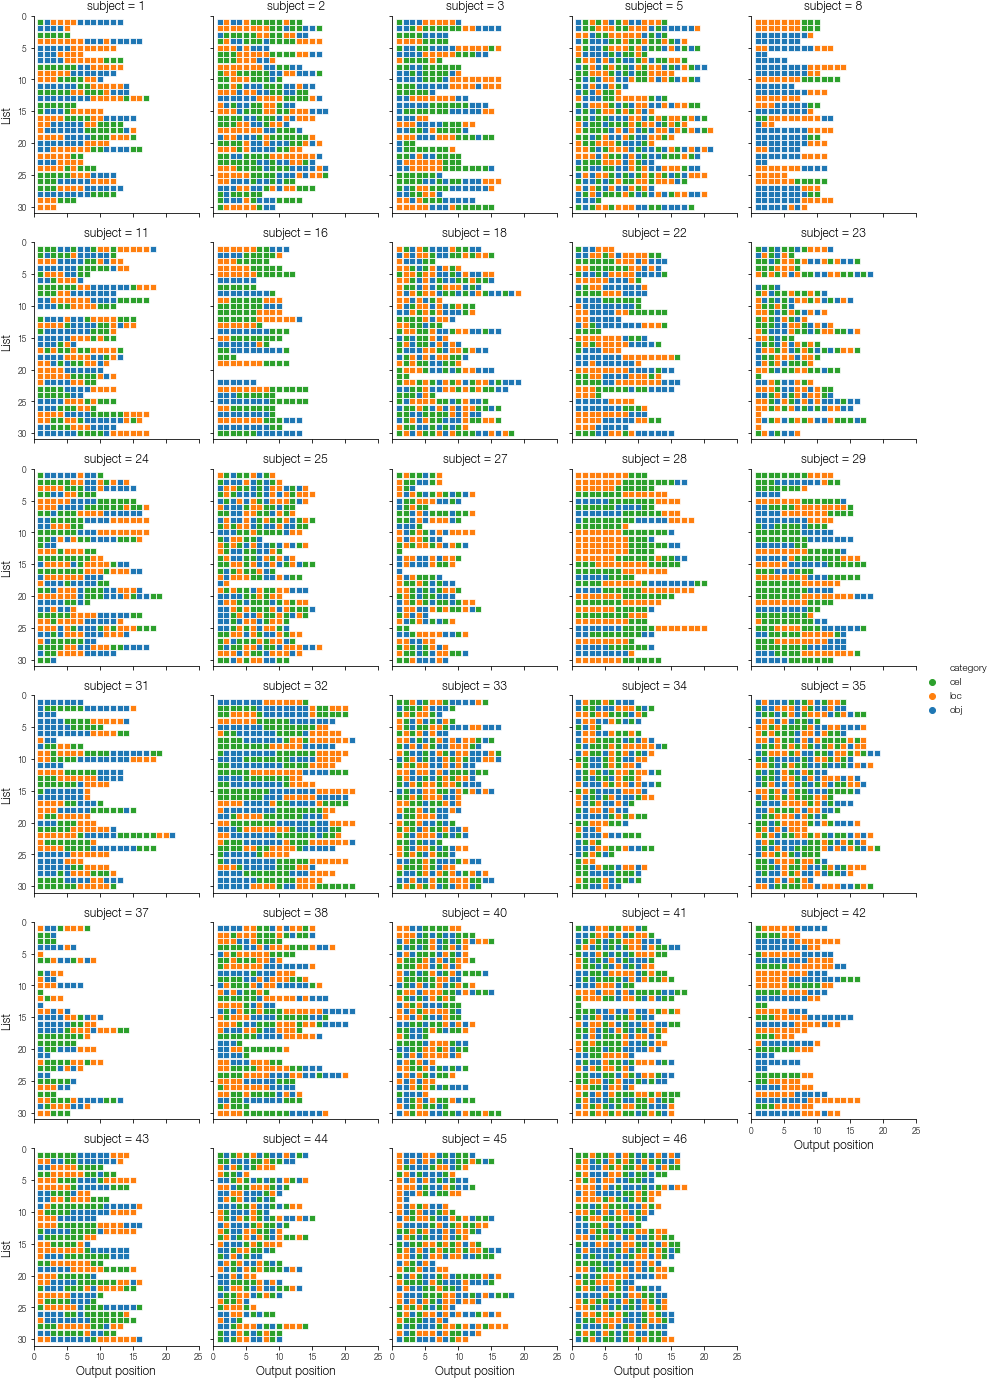

In [55]:
g = fr.plot_raster(fr.reset_list(sim), hue='category', col='subject', 
                   col_wrap=5, length=3.2, orientation='vertical');
g.add_legend();
g.savefig(os.path.join(fit_dir, 'test', 'raster_cat_sim.pdf'))

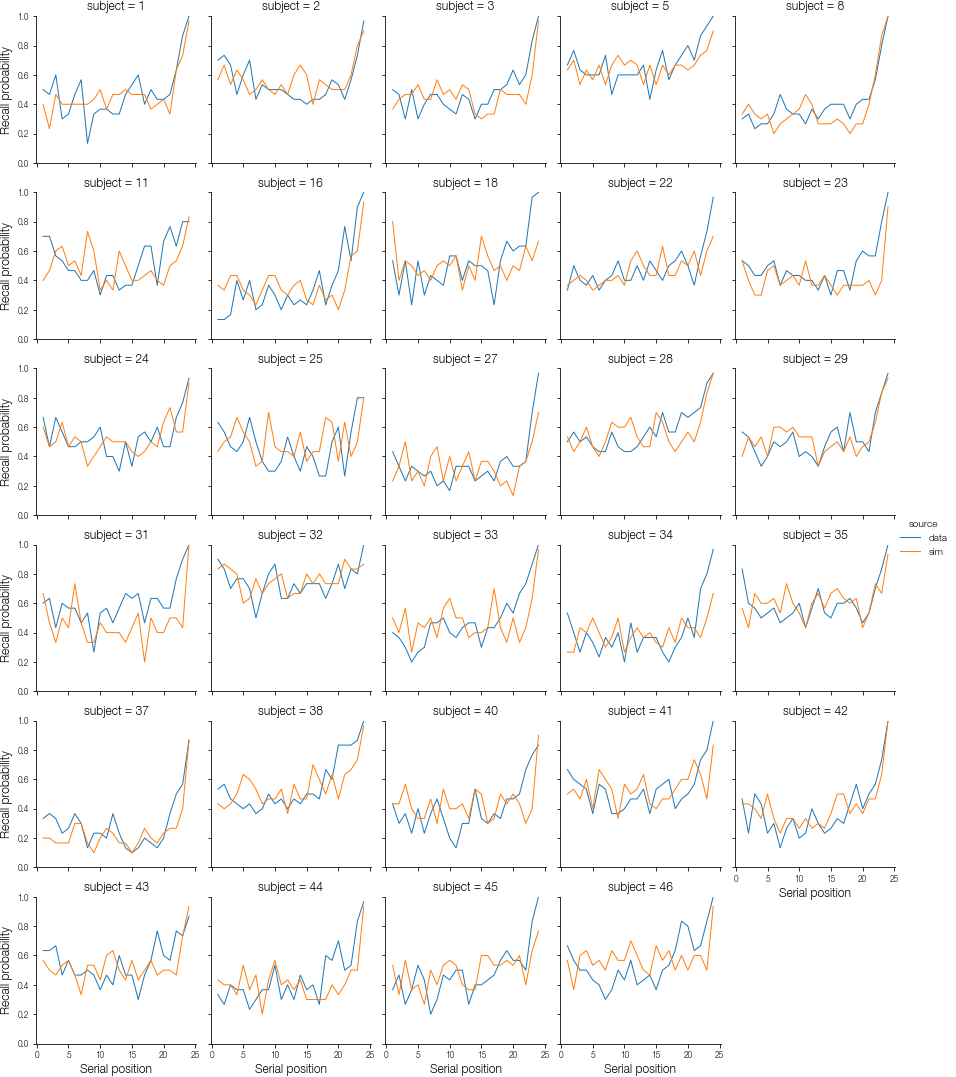

In [33]:
g = fr.plot_spc(spc, hue='source', col='subject', col_wrap=5, height=2.5);
g.add_legend();

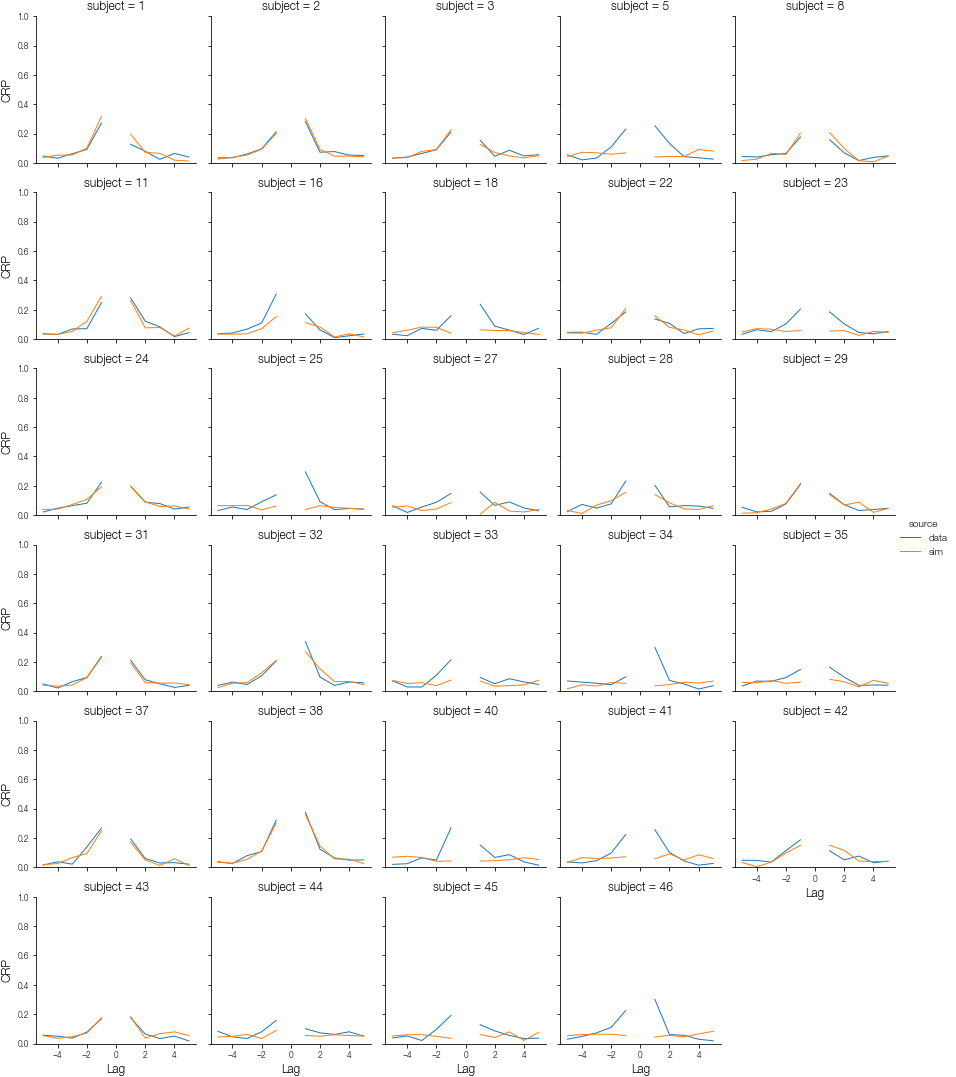

In [34]:
g = fr.plot_lag_crp(crp, hue='source', col='subject', col_wrap=5, height=2.5);
g.add_legend();